<a href="https://colab.research.google.com/github/Odulya/My-progtamm/blob/main/15_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving лиса.jpg to лиса (16).jpg


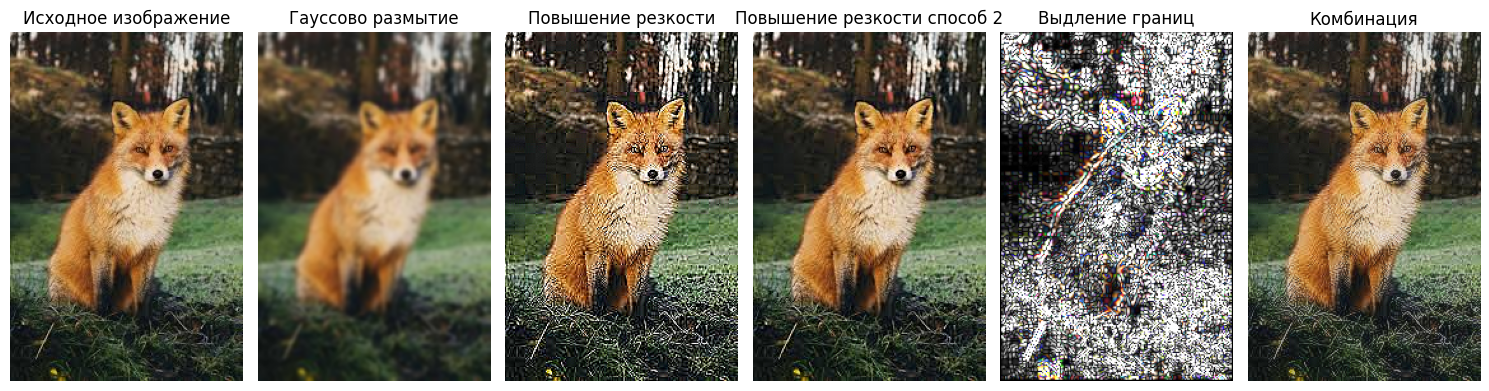

In [29]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Функция для загрузки изображения
uploaded = files.upload()
# Получаем имя загруженного файла
image_path = next(iter(uploaded))

# Читаем загруженное изображение
image = cv2.imread(image_path)

# Обработка, гауссово размытие
blurred_image = cv2.GaussianBlur(image, (7, 7), 0)

# Повышение резкости
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(image, -1, kernel)
sharpened2 = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

# Выделение границ
edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
edges = cv2.convertScaleAbs(edges)

# Комбинирование изображений
combined = cv2.addWeighted(blurred_image, 0.5, sharpened, 0.5, 0)

# Преобразуем изображение из BGR (формат OpenCV) в RGB (формат для Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)
sharpened_rgb = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)
sharpened2_rgb = cv2.cvtColor(sharpened2, cv2.COLOR_BGR2RGB)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

# Отображение изображений
plt.figure(figsize=(15, 5))

# Исходное изображение
plt.subplot(1, 6, 1)
plt.imshow(image_rgb)
plt.title('Исходное изображение')
plt.axis('off')

# Гауссово размазанное изображение
plt.subplot(1, 6, 2)
plt.imshow(blurred_image_rgb)
plt.title('Гауссово размытие')
plt.axis('off')

# Резкое изображение
plt.subplot(1, 6, 3)
plt.imshow(sharpened_rgb)
plt.title('Повышение резкости')
plt.axis('off')

# Резкое изображение 2
plt.subplot(1, 6, 4)
plt.imshow(sharpened2_rgb)
plt.title('Повышение резкости способ 2')
plt.axis('off')

# Выделение границ
plt.subplot(1, 6, 5)
plt.imshow(edges_rgb)
plt.title('Выдление границ')
plt.axis('off')

# Комбинация картинок
plt.subplot(1, 6, 6)
plt.imshow(combined_rgb)
plt.title('Комбинация')
plt.axis('off')

# Показать все изображения
plt.tight_layout()
plt.show()